# <font color='black'>SGD Algorithm to predict movie ratings</font>

<pre>
The data is of this format, each data point is represented as a triplet of user_id, movie_id and rating 
<table>
<tr><th>user_id</th><th>movie_id</th><th>rating</th></tr>
<tr><td>77</td><td>236</td><td>3</td></tr>
<tr><td>471</td><td>208</td><td>5</td></tr>
<tr><td>641</td><td>401</td><td>4</td></tr>
<tr><td>31</td><td>298</td><td>4</td></tr>
<tr><td>58</td><td>504</td><td>5</td></tr>
<tr><td>235</td><td>727</td><td>5</td></tr>
</table>

<font color='black'><b>Predicting the rating for a given (user_id, movie_id) pair </b> </font>


Predicted rating $\hat{y}_{ij}$ for user i, movied j pair is calcuated as $\hat{y}_{ij} = \mu + b_i + c_j + u_i^T v_j$ , here we will be finding the best values of $b_{i}$ and $c_{j}$ using SGD algorithm with the optimization problem for N users and M movies is defined as

$$
L = \min_{ b, c, \{ u_i \}_{i=1}^N, \{ v_j \}_{j=1}^M}
\quad
\alpha \Big(
    \sum_{j} \sum_{k} v_{jk}^2 
    + \sum_{i} \sum_{k} u_{ik}^2 
    + \sum_{i} b_i^2
    + \sum_{j} c_i^2
    \Big)
+ \sum_{i,j \in \mathcal{I}^{\text{train}}}
    (y_{ij} - \mu - b_i - c_j - u_i^T v_j)^2
$$

<ul>
<li><span class="math">\(\mu\)</span> : scalar mean rating</li>
<li><span class="math">\(b_i\)</span> : scalar bias term for user <span class="math">\(i\)</span></li>
<li><span class="math">\(c_j\)</span> : scalar bias term for movie <span class="math">\(j\)</span></li>
<li><span class="math">\(u_i\)</span> : K-dimensional vector for user <span class="math">\(i\)</span></li>
<li><span class="math">\(v_j\)</span> : K-dimensional vector for movie <span class="math">\(j\)</span></li>
</ul>

 $ \ $


1. Constructing adjacency matrix with the given data, assuming its weighted un-directed bi-partited graph and the weight of each edge is the rating given by user to the movie

   constructing this matrix like $A[i][j]=r_{ij}$ here $i$ is user_id, $j$ is movie_id and $r_{ij}$ is rating given by user $i$ to the movie $j$

2. We will Apply SVD decomposition on the Adjaceny matrix and get three matrices $U, \sum, V$ such that $U \times \sum \times V^T = A$, <br> 
if $A$ is of dimensions $N \times M$ then <br>
U is of $N \times k$, <br>
$\sum$ is of $k \times k$ and <br>
$V$ is $M \times k$ dimensions. <br>

   *.  So the matrix $U$ can be represented as matrix representation of users, where each row $u_{i}$ represents a k-dimensional vector for a user

   *. So the matrix $V$ can be represented as matrix representation of movies, where each row $v_{j}$ represents a k-dimensional vector for a movie.
3. Computing $\mu$ , $\mu$  represents the mean of all the rating given in the dataset.
4. For each unique user initilizing a bias value $B_{i}$ to zero, so if we have $N$ users $B$ will be a $N$ dimensional vector, the $i^{th}$ value of the $B$ will corresponds to the bias term for $i^{th}$ user

5. For each unique movie initilizing a bias value $C_{j}$ zero, so if we have $M$ movies $C$ will be a $M$ dimensional vector, the $j^{th}$ value of the $C$ will corresponds to the bias term for $j^{th}$ movie
6. Computing dL/db_i
7. Computing dL/dc_j

8. Printing the mean squared error with predicted ratings.

<pre>
for each epoch:
    for each pair of (user, movie):
        b_i =  b_i - learning_rate * dL/db_i
        c_j =  c_j - learning_rate * dL/dc_j
predicting the ratings with formula
</pre>
$\hat{y}_{ij} = \mu + b_i + c_j + \text{dot_product}(u_i , v_j) $

<br>

In [276]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc

<font color='red'> Reading the csv file </font>

In [112]:
import numpy as np
import pandas as pd
data=pd.read_csv('ratings_train.csv')
data.head()

,user_id,item_id,rating
0,772,36,3
1,471,228,5
2,641,401,4
3,312,98,4
4,58,504,5


In [113]:
data.shape

(89992, 3)

<font color='red'>Creating adjacency matrix </font>

In [114]:
from scipy.sparse import csr_matrix

adjacency_matrix = csr_matrix((data.rating.values, (data.user_id.values, data.item_id.values)), shape=(data.user_id.unique().shape[0], data.item_id.max()+1))

In [116]:
adjacency_matrix.shape

(943, 1681)

<font color='red'> SVD decompostion</font>

In [119]:
# Please use adjacency_matrix as matrix for SVD decompostion
# You can choose n_components as your choice
from sklearn.utils.extmath import randomized_svd
import numpy as np 
U, Sigma, VT = randomized_svd(adjacency_matrix, n_components=100,n_iter=5, random_state=None)
print(U.shape)
print(Sigma.shape)
print(VT.T.shape)

(943, 100)
(100,)
(1681, 100)


<font color='red'>Computing mean of ratings</font>

In [120]:
def m_u(ratings):
    '''In this function, we will compute mean for all the ratings'''
    mu = ratings.mean()

    return mu

In [121]:
mu=m_u(data['rating'])
print(mu)

3.529480398257623


<font color='red'>Initialize $B_{i}$ and $C_{j}$

In [123]:
def initialize(dim):
    '''In this function, we will initialize bias value 'B' and 'C'.'''
    # initalize the value to zeros 
    # return output as a list of zeros 
    vec = np.zeros(dim)

    return vec

In [124]:
dim= adjacency_matrix.shape[0]# number of dimensions for b_i (Here b_i corresponds to users)
b_i=initialize(dim)

In [125]:
dim= adjacency_matrix.shape[1]# number of dimensions for c_j (Here c_j corresponds to movies)
c_j=initialize(dim)

<font color='red'>Compute dL/db_i</font>

In [127]:
def derivative_db(user_id,item_id,rating,U,V,mu,alpha):
    '''In this function, we will compute dL/db_i'''
        
    y_ij = adjacency_matrix[user_id,item_id]
    ui_T_vj = U[user_id,:] @ V[:,item_id]
    
    dL_dbi = 2*(alpha*b_i[user_id] - (y_ij-mu-b_i[user_id]-c_j[item_id]-ui_T_vj))
    
    return dL_dbi


<font color='red'>Compute dL/dc_j</font>

In [131]:
def derivative_dc(user_id,item_id,rating,U,V,mu, alpha):
    '''In this function, we will compute dL/dc_j'''
    
    y_ij = adjacency_matrix[user_id,item_id]
    
    ui_T_vj = U[user_id,:] @ V[:,item_id]
    
    dL_dcj = 2*(alpha*c_j[item_id] - (y_ij-mu-b_i[user_id]-c_j[item_id]-ui_T_vj))
    
    return dL_dcj

<font color='red'>Computing MSE (mean squared error) for predicted ratings</font>


In [133]:
ratings = data.rating.values
ratings

array([3, 5, 4, ..., 2, 5, 3], dtype=int64)

In [136]:
epochs = 15
learning_rate = 0.01
alpha  = 0.01
predicted_matrix = np.zeros((U.shape[0],VT.shape[1]))
#predicted_ratings = []
mse = []
for k in tqdm(range(epochs)):
    predicted_ratings = []
    for i in data.iloc:
            b_i[i[0]] = b_i[i[0]] - (learning_rate*derivative_db(i[0],i[1],i[2],U,VT,mu,alpha))
            c_j[i[1]] = c_j[i[1]] - (learning_rate*derivative_dc(i[0],i[1],i[2],U,VT,mu,alpha))
            predicted_ratings.append(mu + b_i[i[0]] + c_j[i[1]] + (U[i[0],:] @ VT[:,i[1]]))
    mse.append(mean_squared_error(ratings,predicted_ratings))

100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [24:32<00:00, 98.20s/it]


<font color='red'>Plot of epoch number vs MSE </font>

* epoch number on X-axis
* MSE on Y-axis

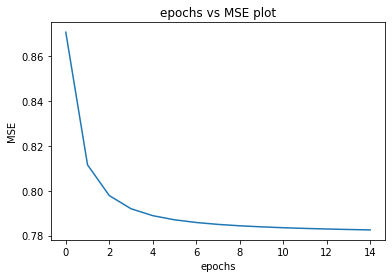

In [289]:
plt.plot(np.arange(epochs),mse)
plt.xlabel("epochs")
plt.ylabel("MSE")
plt.title("epochs vs MSE plot")
plt.show()